In [6]:
# Import for all data load tools
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
# Import for applying KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [14]:

url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-telecom-customer.csv'
df = pd.read_csv(url)
df.tail()


,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1
996,1,7,34,0,2,22.0,5,5,0.0,1,1,1
997,3,67,59,0,40,944.0,5,33,0.0,1,1,4
998,3,70,49,0,18,87.0,2,22,0.0,1,1,3
999,3,50,36,1,7,39.0,3,3,0.0,1,3,2


In [8]:

X = df[['region', 'tenure', 'age', 'marital', 'address',
        'income', 'ed', 'employ', 'retire', 'gender', 'reside']]
y = df['custcat']


In [9]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=4)
print('Train set:', X_train.shape,  y_train.shape)
print('Test set:', X_test.shape,  y_test.shape)


Train set: (750, 11) (750,)
Test set: (250, 11) (250,)


In [15]:
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)
print("The best accuracy was with", max(scores), "with k=", scores.index(max(scores))+1)

[0.268, 0.292, 0.272, 0.26, 0.304, 0.292, 0.34, 0.34, 0.332, 0.308, 0.3, 0.288, 0.292, 0.288, 0.296, 0.3, 0.296, 0.316, 0.324, 0.324, 0.324, 0.324, 0.332, 0.336, 0.344]
The best accuracy was with 0.344 with k= 25


Text(0, 0.5, 'Testing Accuracy')

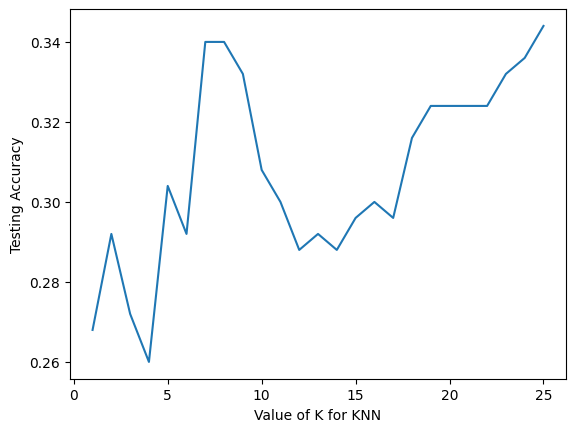

In [11]:
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')


In [20]:
k = 25
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=25)

In [21]:

predictions = neigh.predict(X_test)
print('Classification Report:\n', classification_report(y_test, predictions))

print('Confusion Matrix:\n', confusion_matrix(y_test, predictions))
print('Accuracy Score:', accuracy_score(y_test, predictions))


Classification Report:
               precision    recall  f1-score   support

           1       0.40      0.64      0.49        64
           2       0.38      0.35      0.36        51
           3       0.31      0.31      0.31        70
           4       0.19      0.08      0.11        65

    accuracy                           0.34       250
   macro avg       0.32      0.35      0.32       250
weighted avg       0.31      0.34      0.31       250

Confusion Matrix:
 [[41  5  9  9]
 [ 9 18 17  7]
 [29 13 22  6]
 [24 12 24  5]]
Accuracy Score: 0.344
